## This file just compares the accuracy and loss 
## the same model in Tensorflow and Flux

In [13]:
using PyCall
using BSON 
@pyimport pickle

function unpickle(filename)
    r = nothing
    @pywith pybuiltin("open")(filename,"rb") as f begin
        r = pickle.load(f)
    end
    return r
end

unpickle (generic function with 1 method)

In [28]:
fluxhistory=BSON.load("juliahistory.bson")
flux_acc=fluxhistory[:history][2]
flux_loss=fluxhistory[:history][1]

kerashistory=myunpickle("history.pickle")[1]
keras_loss=float.(kerashistory["loss"])
keras_acc=float.(kerashistory["accuracy"])

30-element Array{Float64,1}:
 0.7468666434288025
 0.8114166855812073
 0.8362166881561279
 0.8462333083152771
 0.8583499789237976
 0.860966682434082 
 0.8685833215713501
 0.8715333342552185
 0.8764166831970215
 0.8807333111763   
 0.8811500072479248
 0.8862166404724121
 0.8855999708175659
 ⋮                 
 0.8960000276565552
 0.8966833353042603
 0.897350013256073 
 0.901366651058197 
 0.8996166586875916
 0.9000333547592163
 0.9011833071708679
 0.9033499956130981
 0.9051666855812073
 0.9034000039100647
 0.9053833484649658
 0.90461665391922  

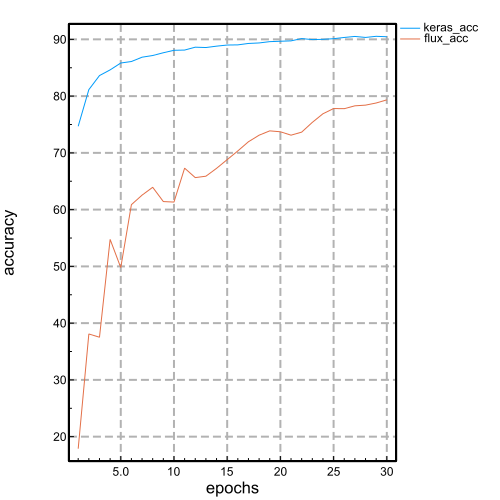

In [50]:
using Plots
inspectdr()
plot( 1:30, [keras_acc .*100, flux_acc .* 100, ],xlabel="epochs",ylabel="accuracy", label=[ "keras_acc" "flux_acc"],size = (500, 500))

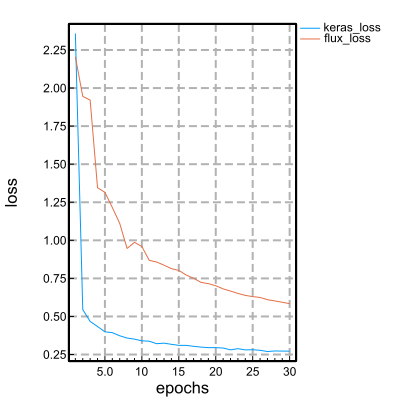

In [56]:
plot( 1:30, [keras_loss, flux_loss], xlabel="epochs",ylabel="loss", label=[ "keras_loss" "flux_loss"],size = (400, 400))